In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import io
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
sns.set_context("talk")
import datetime
import getpass
import sqlalchemy as db
import time
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [36]:
#Data source: https://transparencia.sns.gov.pt/explore/?sort=modified
Ab = pd.read_csv("antibioticos_Jan22.csv", sep = ";")

In [37]:
#Weight of antibiotic consumption ("Peso") in total consumption, per hospital and health region
Ab.head()

,Período,ARS,Hospital,Localização Geográfica,Grupo Hospitalar,Unidades Antibióticos,Unidades Totais,Peso
0,2015-01,Alentejo,"Unidade Local de Saúde do Baixo Alentejo, E.P.E.","38.014123,-7.8721227",Grupo C,9162,343630,2.666237
1,2015-01,Centro,"Centro Hospitalar de Leiria, E.P.E.","39.7414812,-8.7982706",Grupo C,19973,231541,8.626118
2,2015-01,Centro,"Centro Hospitalar do Baixo Vouga, E.P.E.","40.6362453,-8.6543716",Grupo C,20778,359202,5.784481
3,2015-01,Centro,"Centro Hospitalar Tondela-Viseu, E.P.E.","40.516364,-8.0827433",Grupo D,25669,478722,5.361981
4,2015-01,Centro,Hospital Dr. Francisco Zagalo - Ovar,"40.8571967,-8.6318023",Grupo A,1720,23756,7.240273


Peso = Consumed Units of Antibiotics / Total Units Consumed

In [38]:
#convert to datetime
Ab['Período'] = pd.to_datetime(Ab['Período']) 

In [39]:
#check data types
Ab.dtypes

Período                   datetime64[ns]
ARS                               object
Hospital                          object
Localização Geográfica            object
Grupo Hospitalar                  object
Unidades Antibióticos              int64
Unidades Totais                    int64
Peso                             float64
dtype: object

In [40]:
#create column with year to help filter data
Ab['year'] = pd. DatetimeIndex(Ab['Período']).year

In [41]:
Ab.head()

,Período,ARS,Hospital,Localização Geográfica,Grupo Hospitalar,Unidades Antibióticos,Unidades Totais,Peso,year
0,2015-01-01,Alentejo,"Unidade Local de Saúde do Baixo Alentejo, E.P.E.","38.014123,-7.8721227",Grupo C,9162,343630,2.666237,2015
1,2015-01-01,Centro,"Centro Hospitalar de Leiria, E.P.E.","39.7414812,-8.7982706",Grupo C,19973,231541,8.626118,2015
2,2015-01-01,Centro,"Centro Hospitalar do Baixo Vouga, E.P.E.","40.6362453,-8.6543716",Grupo C,20778,359202,5.784481,2015
3,2015-01-01,Centro,"Centro Hospitalar Tondela-Viseu, E.P.E.","40.516364,-8.0827433",Grupo D,25669,478722,5.361981,2015
4,2015-01-01,Centro,Hospital Dr. Francisco Zagalo - Ovar,"40.8571967,-8.6318023",Grupo A,1720,23756,7.240273,2015


In [42]:
Ab_2020 = Ab.loc[Ab['year'] == 2020]

In [43]:
Ab_2020.head()

,Período,ARS,Hospital,Localização Geográfica,Grupo Hospitalar,Unidades Antibióticos,Unidades Totais,Peso,year
621,2020-01-01,Algarve,"Centro Hospitalar Universitário do Algarve, E....","37.0238973,-7.9281554",Grupo D,23583,498477,0.047311,2020
622,2020-01-01,Centro,"Centro Hospitalar de Leiria, E.P.E.","39.7414812,-8.7982706",Grupo C,25907,378352,0.068473,2020
623,2020-01-01,Centro,"Centro Hospitalar Universitário Cova da Beira,...","40.2804158,-7.4922407",Grupo C,9039,192234,0.047021,2020
624,2020-01-01,LVT,"Centro Hospitalar de Setúbal, E.P.E.","38.5283754,-8.8818638",Grupo C,18081,371469,0.048675,2020
625,2020-01-01,LVT,"Centro Hospitalar do Oeste, E.P.E.","39.4054629,-9.1258493",Grupo B,17070,282127,0.060507,2020


In [44]:
len(Ab_2020.index)

540

In [45]:
Ab_2020['Hospital'].nunique()

45

In [46]:
Ab_2020_hospital = Ab_2020.groupby(['Hospital','year']).sum()

In [47]:
Ab_2020_hospital.head()

,,Unidades Antibióticos,Unidades Totais,Peso
Hospital,year,,,
"Centro Hospitalar Barreiro Montijo, E.P.E.",2020,162398,3380197,0.579327
Centro Hospitalar Psiquiátrico de Lisboa,2020,6821,1459771,0.055839
"Centro Hospitalar Póvoa de Varzim / Vila do Conde, E.P.E.",2020,50384,829498,0.742438
"Centro Hospitalar Tondela-Viseu, E.P.E.",2020,234162,5295681,0.531762
"Centro Hospitalar Universitário Cova da Beira, E.P.E.",2020,98720,1979384,0.599635


In [48]:
Ab_2020_hospital['Antibiotics/Total'] = Ab_2020_hospital['Unidades Antibióticos']/Ab_2020_hospital['Unidades Totais']

In [49]:
Ab_2020_hospital.drop('Peso', axis=1, inplace=True)

In [50]:
Ab_2020_hospital['Unidades Antibióticos'].max()

768216

In [51]:
Ab_2020_hospital['Unidades Totais'].max()

21173571

In [52]:
Ab_2020_hospital.shape

(45, 3)

In [53]:
pHat = Ab_2020_hospital['Antibiotics/Total'].mean()
pHat

0.03971331460060653

In [54]:
cind95 = norm.ppf(1-0.05/2)
cind99 = norm.ppf(1-0.001/2)

In [55]:
upper95 = [(pHat + cind95*math.sqrt(50*pHat*(1-pHat)/n)) for n in range(1,768216,1)]
upper99 = [(pHat + cind99*math.sqrt(30*pHat*(1-pHat)/n)) for n in range(1,768216,1)]

In [56]:
lower95 = [(pHat - cind95*math.sqrt(50*pHat*(1-pHat)/n)) for n in range(1,768216,1)]
lower99 = [(pHat - cind99*math.sqrt(30*pHat*(1-pHat)/n)) for n in range(1,768216,1)]

In [57]:
Ab_2020_hospital['Antibiotics/Total'].mean()

0.03971331460060653

Text(0.5, 1.0, 'Antibiotic weight in total consumption units in 2020 per hospital')

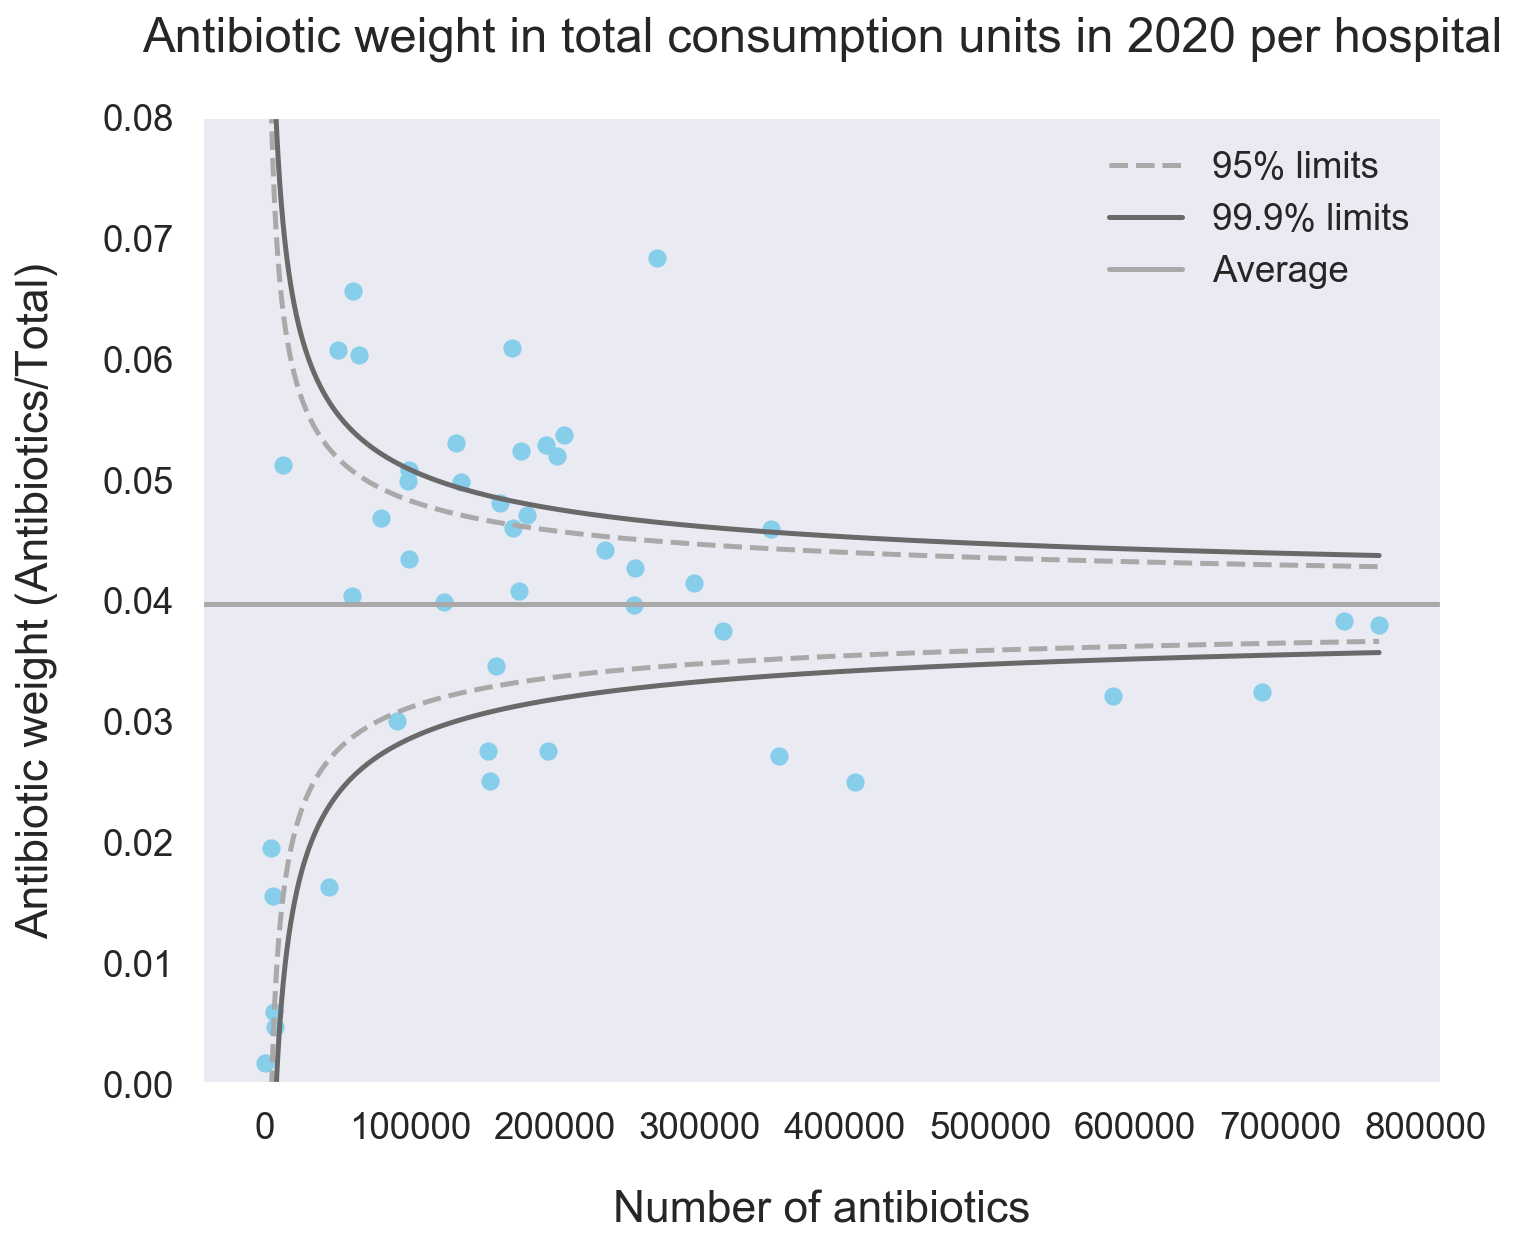

In [58]:
plt.figure(figsize=(10,8), dpi= 80)
sns.set_style("dark")
plt.plot([n for n in range(6,768216,1)],upper95[5:], '-', color='darkgrey', linestyle='--',label='95% limits') 
plt.plot([n for n in range(10,768216,1)],upper99[9:], '-', color ='dimgrey',label='99.9% limits') 
plt.plot([n for n in range(6,768216,1)],lower95[5:], '-', color='darkgrey', linestyle='--') 
plt.plot([n for n in range(10,768216,1)],lower99[9:], '-', color ='dimgrey')
plt.axhline(y=0.03971, color ="darkgrey",linestyle='-', label='Average' )
plt.ylim(0, 0.08)
plt.legend(frameon=False)


plt.scatter(Ab_2020_hospital['Unidades Antibióticos'], Ab_2020_hospital['Antibiotics/Total'],s=45, color='skyblue')

plt.ylabel('Antibiotic weight (Antibiotics/Total)', fontsize=20, labelpad=20)
plt.xlabel('Number of antibiotics', fontsize=20, labelpad=20)

plt.title("Antibiotic weight in total consumption units in 2020 per hospital", loc='Center', fontsize = 22, pad=30)

#plt.savefig('funnel.png', dpi=100)

### What if we compare with consumption in a year before the pandemic (2019)?

In [59]:
Ab_2019 = Ab.loc[Ab['year'] == 2019]

In [60]:
Ab_2019_hospital = Ab_2019.groupby(['Hospital','year']).sum()

In [61]:
Ab_2019_hospital.head()

,,Unidades Antibióticos,Unidades Totais,Peso
Hospital,year,,,
"Centro Hospitalar Barreiro Montijo, E.P.E.",2019,174074,3539754,0.591237
Centro Hospitalar Psiquiátrico de Lisboa,2019,9221,1532575,0.072274
"Centro Hospitalar Póvoa de Varzim / Vila do Conde, E.P.E.",2019,58542,992509,0.710277
"Centro Hospitalar Tondela-Viseu, E.P.E.",2019,264371,5783638,0.549063
"Centro Hospitalar Universitário Cova da Beira, E.P.E.",2019,98839,2048537,0.579886


In [62]:
Ab_2019_hospital['Antibiotics/Total'] = Ab_2019_hospital['Unidades Antibióticos']/Ab_2019_hospital['Unidades Totais']

In [63]:
Ab_2019_hospital['Unidades Antibióticos'].max()

806445

In [64]:
pHat_19 = Ab_2019_hospital['Antibiotics/Total'].mean()
pHat_19

0.040289453672538875

In [65]:
upper95_19 = [(pHat_19 + cind95*math.sqrt(50*pHat_19*(1-pHat_19)/n)) for n in range(1,806445,1)]
upper99_19 = [(pHat_19 + cind99*math.sqrt(30*pHat_19*(1-pHat_19)/n)) for n in range(1,806445,1)]

In [66]:
lower95_19 = [(pHat_19 - cind95*math.sqrt(50*pHat_19*(1-pHat_19)/n)) for n in range(1,806445,1)]
lower99_19 = [(pHat_19 - cind99*math.sqrt(30*pHat_19*(1-pHat_19)/n)) for n in range(1,806445,1)]

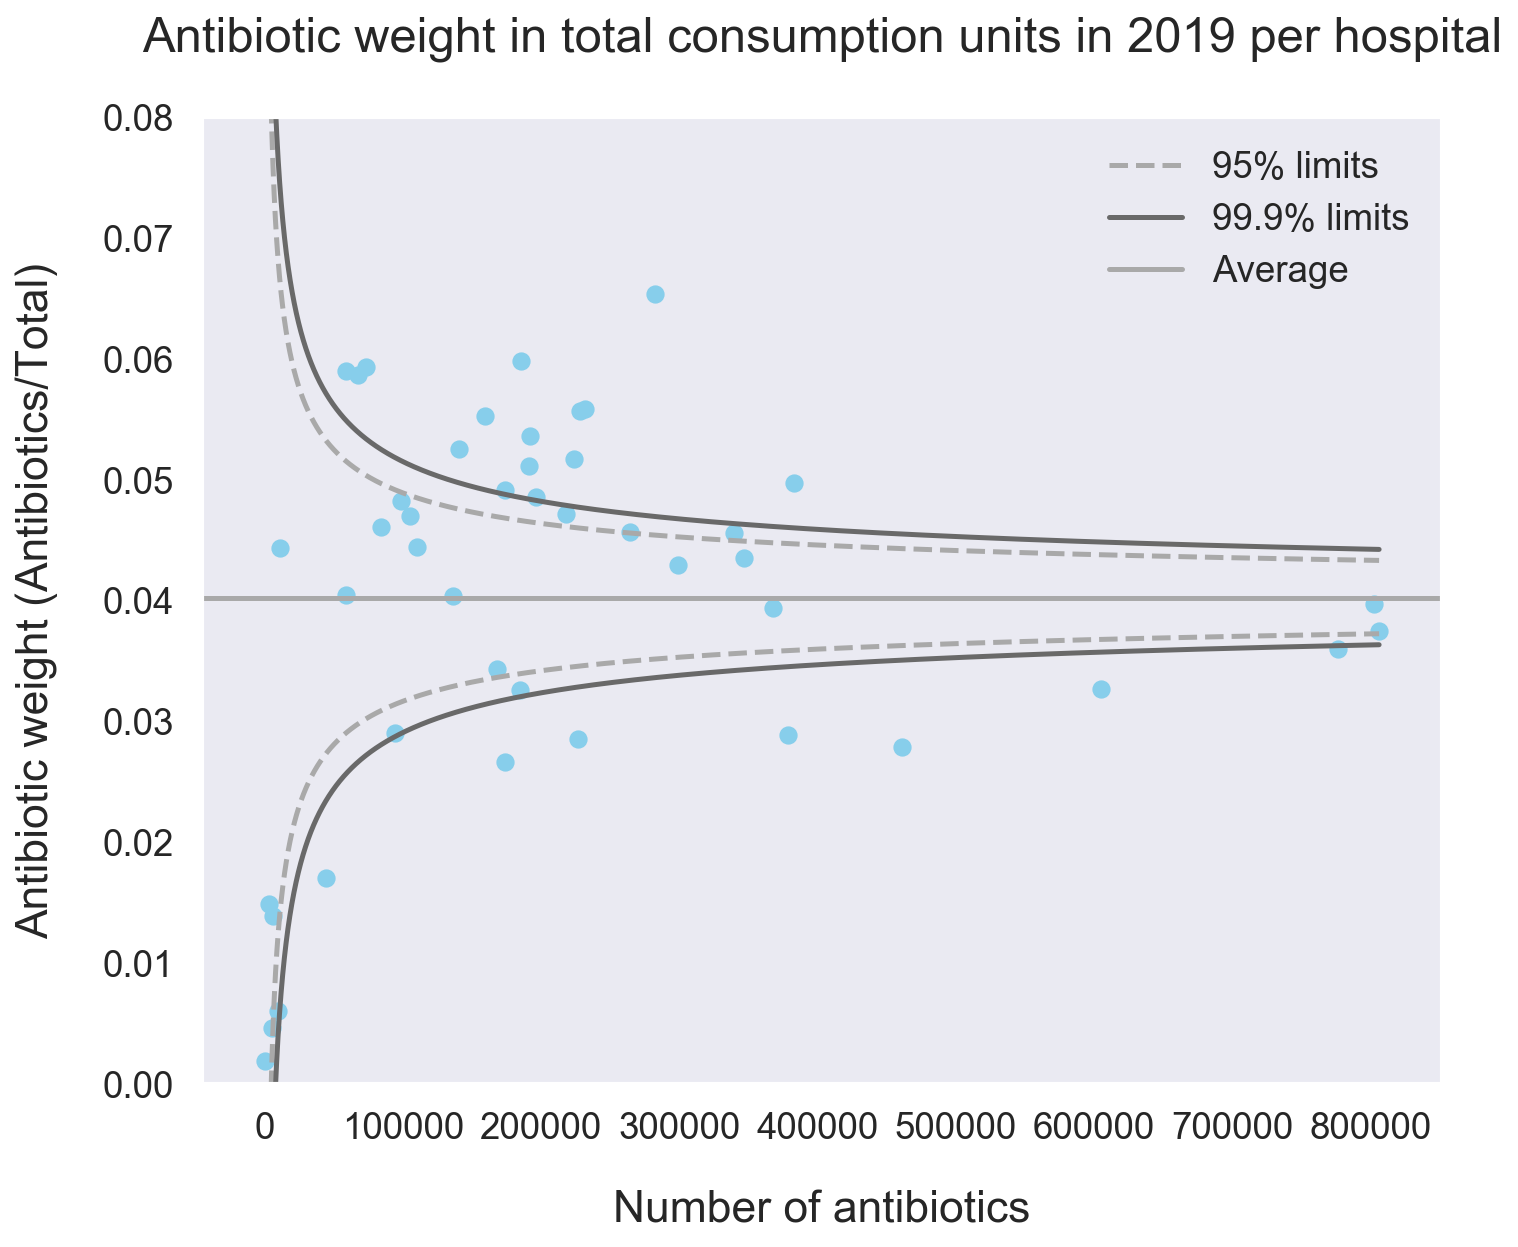

In [68]:
plt.figure(figsize=(10,8), dpi= 80)
sns.set_style("dark")
plt.plot([n for n in range(6,806445,1)],upper95_19[5:], '-', color='darkgrey', linestyle='--',label='95% limits') 
plt.plot([n for n in range(10,806445,1)],upper99_19[9:], '-', color ='dimgrey',label='99.9% limits') 
plt.plot([n for n in range(6,806445,1)],lower95_19[5:], '-', color='darkgrey', linestyle='--') 
plt.plot([n for n in range(10,806445,1)],lower99_19[9:], '-', color ='dimgrey')
plt.axhline(y=0.0402, color ="darkgrey",linestyle='-', label='Average' )
plt.ylim(0, 0.08)
plt.legend(frameon=False)


plt.scatter(Ab_2019_hospital['Unidades Antibióticos'], Ab_2019_hospital['Antibiotics/Total'],s=45, color='skyblue')

plt.ylabel('Antibiotic weight (Antibiotics/Total)', fontsize=20, labelpad=20)
plt.xlabel('Number of antibiotics', fontsize=20, labelpad=20)

plt.title("Antibiotic weight in total consumption units in 2019 per hospital", loc='Center', fontsize = 22, pad=30)

plt.savefig('funnel_2019.png', dpi=100)